## L'importanza dei dati nei diversi ambiti scientifici e ingegneristici

Diversi ambiti della scienza e dell’ingegneria sono profondamente radicati nelle specificità dei dati.  
Ad esempio:

- **Sir Isaac Newton** formulò le leggi del moto e della gravitazione universale basandosi su osservazioni del moto dei pianeti e di altri oggetti sulla Terra.
- **Claude Shannon**, considerato il *padre della teoria dell'informazione* e inventore del concetto di *bit* come unità di misura dell'informazione, sviluppò una teoria matematica rivoluzionaria della comunicazione basata su modelli probabilistici di canali di trasmissione, sia wireless che cablati.

Allo stesso modo, **il primo passo in qualsiasi attività in ambito finanziario o di ingegneria finanziaria dovrebbe essere la comprensione dei dati finanziari**.

Lo studio e la caratterizzazione dei dati finanziari iniziarono a svilupparsi già negli anni '60 (Fama, 1965; Mandelbrot, 1963) e oggi rappresentano un argomento maturo, in cui accademici e professionisti hanno evidenziato alcune particolarità dei dati comunemente note come **“fatti stilizzati”** (*stylized facts*).

Questo capitolo ci guida in un’analisi esplorativa piuttosto visiva dei dati finanziari, basata su dati di mercato empirici.

## Fatti Stilizzati dei Dati Finanziari

I **fatti stilizzati** sono proprietà comuni osservate in molti strumenti, mercati e periodi temporali, confermate da studi indipendenti (Cont, 2001; McNeil et al., 2015). Alcuni esempi rilevanti includono:

###  **Mancanza di stazionarietà**
Le statistiche delle serie temporali finanziarie cambiano nel tempo: i rendimenti passati non riflettono necessariamente le performance future.

### **Clustering della volatilità**
Grandi variazioni di prezzo tendono a essere seguite da altre grandi variazioni (indipendentemente dal segno), mentre piccole variazioni tendono a essere seguite da piccole variazioni (Fama, 1965; Mandelbrot, 1963).

### **Assenza di autocorrelazione**
Le autocorrelazioni dei rendimenti sono spesso insignificanti (Ding e Granger, 1996), in linea con l'ipotesi di mercato efficiente (Fama, 1970).

### **Code pesanti**
Le distribuzioni gaussiane non descrivono adeguatamente i dati finanziari; le distribuzioni mostrano invece code pesanti (*heavy tails*).

### **Asimmetria guadagni/perdite**
La distribuzione dei rendimenti non è simmetrica.

### **Correlazione positiva tra asset**
I rendimenti sono spesso positivamente correlati, poiché gli asset tendono a muoversi insieme al mercato.

---

## Frequenza dei Dati e Caratteristiche Osservate

Le caratteristiche dei dati possono variare in base alla frequenza temporale:

###  **Bassa frequenza** (settimanale, mensile, trimestrale)
- Le distribuzioni gaussiane possono essere accettabili dopo la correzione per il clustering della volatilità (eccetto per l'asimmetria).
- La scarsità di dati rappresenta un limite per l'analisi statistica.

### **Media frequenza** (giornaliera)
- Le code pesanti non possono essere ignorate, anche dopo la correzione per la volatilità.
- La quantità di dati è generalmente sufficiente, a patto che i modelli non siano troppo complessi (per evitare *overfitting*).

###  **Alta frequenza** (intragiornaliera, 30 min, 5 min, *tick-data*)
- Sono disponibili grandi quantità di dati, rendendo questo regime adatto ad analisi avanzate e tecniche di *machine learning*.
- All’aumentare della frequenza, il rumore di microstruttura diventa più rilevante, richiedendo modelli alternativi.


## Il Prezzo di un'Attività Finanziaria

Il **prezzo di un'attività** è con ogni probabilità la quantità più ovvia che si possa osservare nei mercati finanziari. Lo indichiamo con: $P_t$ dove: $t$ è l'indice temporale discreto (ma può anche essere continuo), corrispondente a periodi arbitrari come minuti, ore, giorni, settimane, mesi, trimestri o anni.

### Logaritmo del Prezzo

Quando si tratta di modellizzazione, risulta utile considerare il **logaritmo del prezzo**, ovvero:

$$y_{t}\triangleq log(p_{t})$$

È matematicamente più conveniente. 

Inoltre, l'uso del logaritmo ha il vantaggio di poter rappresentare naturalmente un intervallo dinamico molto più ampio del segnale (cioè, i valori molto piccoli vengono amplificati e quelli grandi attenuati).

Alcuni manuali accessibili che trattano la modellazione dei dati finanziari sono Meucci (2005), Cowpertwait e Metcalfe (2009), Tsay (2010), Ruppert e Matteson (2015), con un'enfasi maggiore sul caso multi-asset in Lütkepohl (2007) e Tsay (2013).

Il modello più semplice per i log-prezzi è il *random walk* (passeggiata aleatoria).

$$
\begin{equation}
  y_{t} = \mu+y_{t-1} + \epsilon_{t},
  \tag{2.1}
\end{equation}
$$

dove $\mu$ è il *drift* (tendenza) e $\varepsilon_t$ è il rumore casuale *i.i.d.* (indipendente e identicamente distribuito).  
La **Figura 2.1** mostra i prezzi giornalieri dell'indice azionario **S&P 500** su un arco di oltre un decennio, mentre la **Figura 2.2** mostra i prezzi giornalieri del **Bitcoin** su sei anni, entrambi su scala logaritmica (che equivale a rappresentare i log-prezzi su una scala lineare).



<Axes: xlabel='Date'>

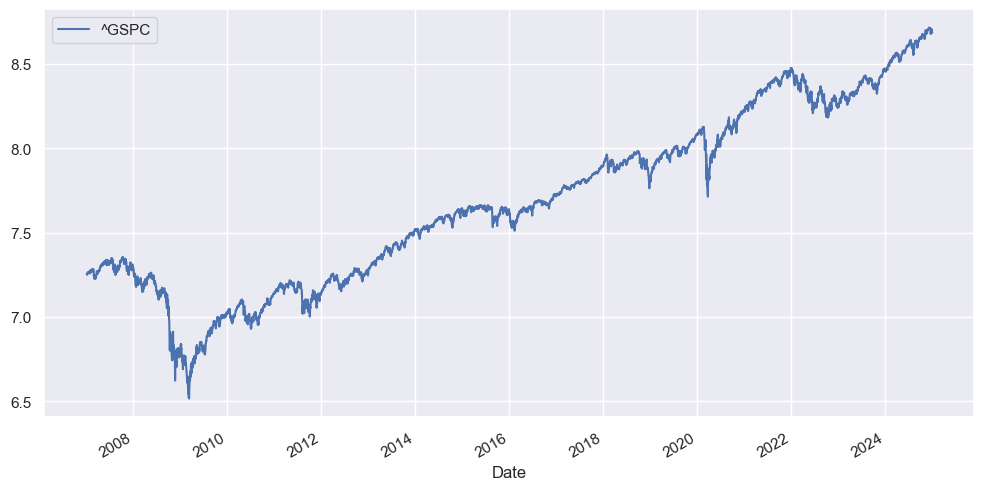

In [1]:
import pandas as pd
import numpy as np

# Statistical analysis
from scipy.stats import norm, skew, kurtosis
import arch

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

sp500_prices = pd.read_csv('./data/sp500.csv',parse_dates=[0], index_col=0)
fig, ax = plt.subplots(figsize=(12, 6))
np.log(sp500_prices).plot(ax=ax)

<Axes: xlabel='Date'>

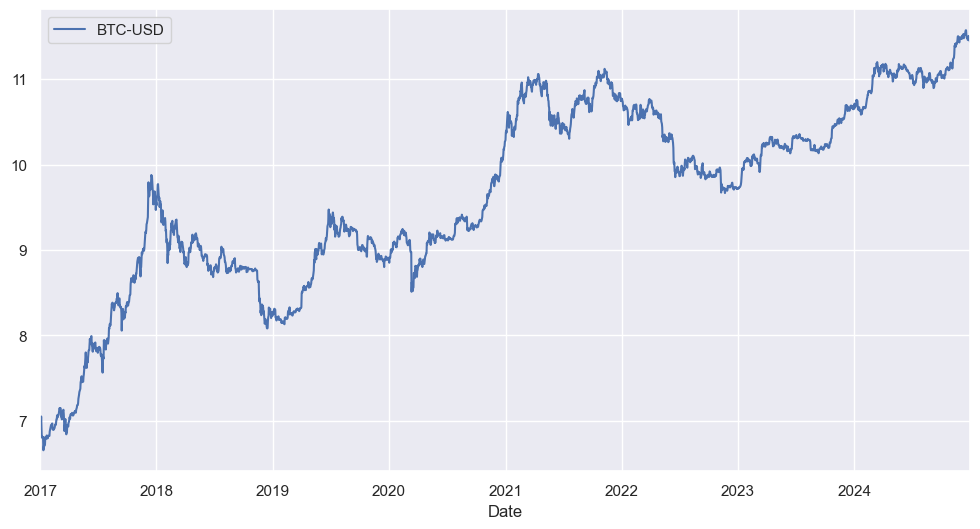

In [2]:
btc_prices = pd.read_csv('./data/btc.csv',parse_dates=[0], index_col=0)

fig, ax = plt.subplots(figsize=(12, 6))
np.log(btc_prices).plot(ax=ax)

Un'altra grandezza fondamentale è la variazione di prezzo, detta anche *rendimento*, che, a differenza del prezzo assoluto, mostra un certo grado di *stazionarietà* e può risultare più conveniente per la modellazione matematica.  
Tra le diverse definizioni di rendimento (Ruppert e Matteson, 2015; Tsay, 2010), ci concentreremo su due tipi che presentano importanti proprietà additive su due domini differenti:

* Il *rendimento lineare* (noto anche come *rendimento semplice* o *netto*) è definito come
$$
r^{{lin}}_t   \triangleq\frac{p_{t}-p_{t-1}}{p_{t-1}}=\frac{p_{t}}{p_{t-1}}-1
$$

e ha la proprietà di essere *additivo* tra gli asset (cioè, il rendimento lineare complessivo derivante dall’investimento in più asset è pari alla somma dei rendimenti dei singoli asset, pesati in base alla percentuale del budget investito in ciascuno).  
Pertanto, i *rendimenti lineari* sono fondamentali quando si analizza il rendimento di un portafoglio composto da più asset (si veda il Capitolo 6 per maggiori dettagli).

* Il *rendimento logaritmico* (noto anche come *rendimento composto continuamente*) è definito come

$$
r^{log}_t    \triangleq y_{t}-y_{t-1}=\log\left(\frac{p_{t}}{p_{t-1}}\right)
$$

e ha la proprietà di essere *additivo* nel dominio temporale (cioè, il rendimento logaritmico su un lungo periodo è pari alla somma dei rendimenti logaritmici dei periodi di base all'interno di quel lungo periodo).  
Pertanto, i *rendimenti logaritmici* sono preferiti nella modellazione matematica delle serie temporali (si vedano i Capitoli 3–4).  
Ad esempio, secondo il precedente modello di *random walk* nella (2.1), il rendimento logaritmico è *stazionario*:

$$
r^{log}_t=y_{t}-y_{t-1}=\mu+\epsilon_{t}.
$$

Curiosamente, il *rendimento semplice* e il *rendimento logaritmico* sono collegati tra loro come segue:
$$
r^{log}_t = \log\left(1+r^{lin}_t\right),
$$

Questo porta alla comoda approssimazione  $$r_{log} \approx r_{lin}$$  quando $r_{lin}$ è piccolo, come illustrato nella Figura 2.3. L'approssimazione è quasi perfetta quando l'entità del rendimento è inferiore a 0,05 o 5%, dopodiché si degrada gradualmente.


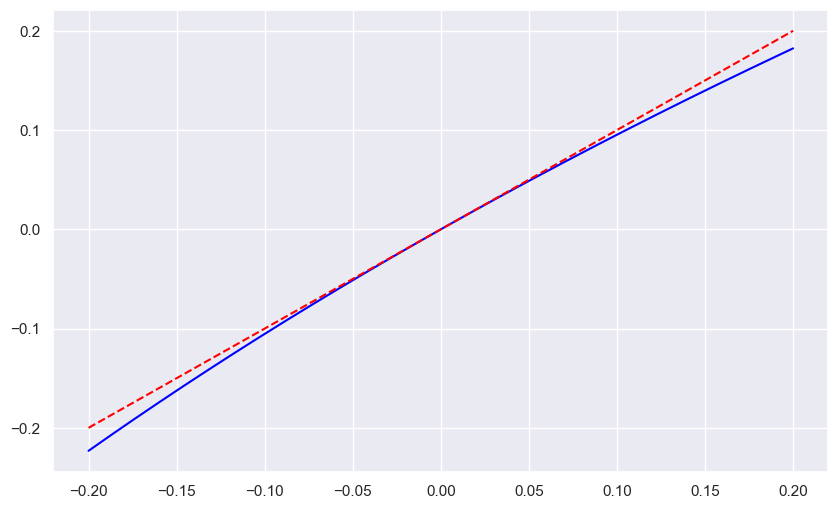

In [3]:
simple_returns = np.linspace(-0.2, 0.2, 400)
log_returns = np.log(1 + simple_returns)


plt.figure(figsize=(10, 6))


plt.plot(simple_returns, log_returns, label='Log-Return', color='blue')
plt.plot(simple_returns, simple_returns, label='Simple Return', linestyle='--', color='red')


La **Figura 2.4** mostra i ritorni logaritmici giornalieri dell'indice azionario **S&P 500** su un periodo di oltre un decennio. Si può facilmente osservare il periodo di **alta volatilità durante la crisi finanziaria globale del 2008**, così come il **picco di volatilità all'inizio del 2020** dovuto alla pandemia di **COVID-19**.

La **Figura 2.5** mostra i ritorni logaritmici giornalieri di **Bitcoin** su un arco di sei anni. Si noti il **flash crash di Bitcoin del 12 marzo 2020**, con un calo vicino al **50% in un solo giorno**.



In [4]:
# S&P 500 returns
sp500_returns = np.log(sp500_prices).diff().dropna()

# Bitcoin returns
btc_returns = np.log(btc_prices).diff().dropna()

In [5]:
def plot_returns(returns, title):
    fig, ax = plt.subplots(figsize=(12,6))
    ax.plot(returns, linewidth=0.5)
    ax.set_title(title)
    ax.set_xlabel('Date')
    ax.set_ylabel('Log Return')
    plt.show()

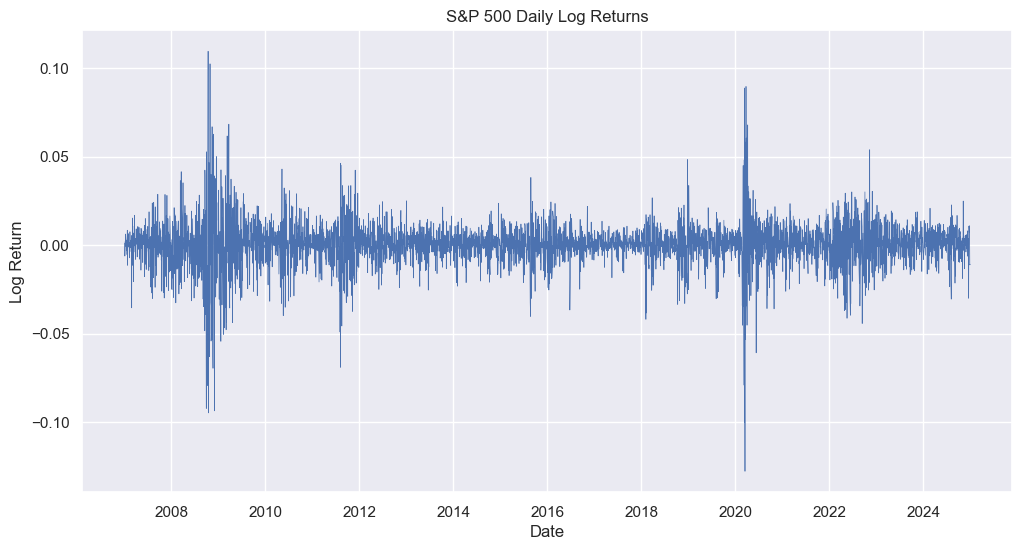

In [6]:
plot_returns(sp500_returns, 'S&P 500 Daily Log Returns')

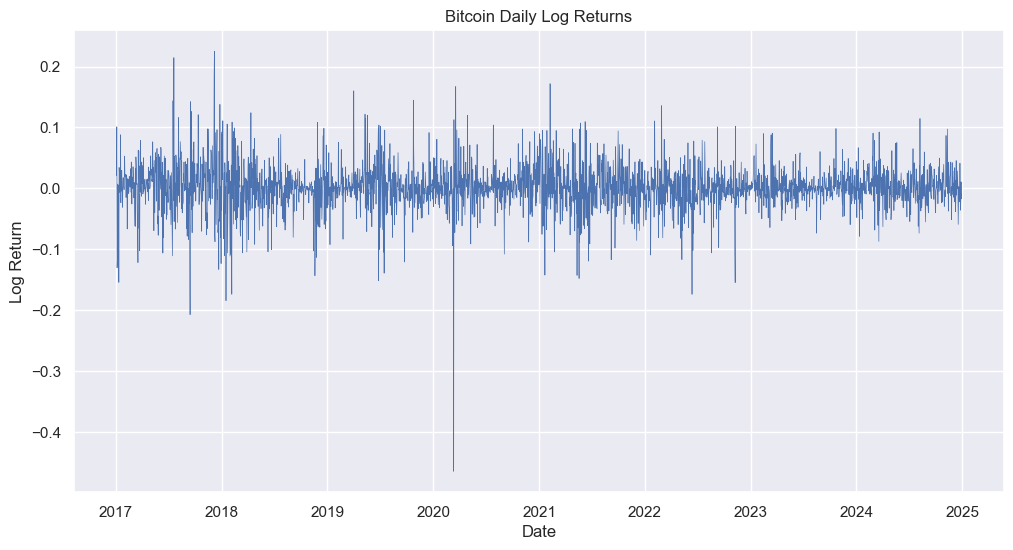

In [7]:
plot_returns(btc_returns, 'Bitcoin Daily Log Returns')

È interessante confrontare i livelli di volatilità delle due classi di attività. La volatilità annualizzata dell'indice azionario S&P 500 è dell'ordine del 21%, mentre per Bitcoin è intorno al 78%. In generale, un valore compreso tra il 12% e il 20% è considerato basso, mentre sopra il 30% è considerato estremamente volatile. Pertanto, l'S&P 500 ha una bassa volatilità, mentre Bitcoin è estremamente volatile.

# Dati non gaussiani asimmetria e code pesanti

## Distribuzione Normale (o Gaussiana)

La **distribuzione gaussiana** o **normale** è una delle più comunemente utilizzate per le **variabili casuali continue** grazie alla sua facilità di manipolazione matematica. 

È caratterizzata da due parametri:
- **Media** (μ)
- **Varianza** (σ²)

Questi rappresentano rispettivamente il **momento del primo ordine** e il **momento del secondo ordine**.

La sua **funzione di densità di probabilità (pdf)** è data da:

$$
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{(x - \mu)^2}{2\sigma^2} \right)
$$

dove  
$\mu$ è la media e  
$\sigma^2$ è la varianza.

In molti ambiti, la **distribuzione gaussiana** può effettivamente essere appropriata e facilmente giustificata da **principi fisici** (come il rumore termico onnipresente nei circuiti elettronici che ostacola i sistemi di comunicazione). 

Tuttavia, in altri contesti, come i **sistemi radar** e **finanziari**, le quantità casuali spesso **non seguono una distribuzione gaussiana** e sono necessari **momenti di ordine superiore** per una caratterizzazione adeguata (Jondeau et al., 2007). 

Due nuovi aspetti entrano in gioco per una corretta caratterizzazione:

- **La skewness**: misura dell’**asimmetria** della distribuzione.
- **La kurtosi**: misura dello **spessore delle code** (cioè, se le code decadono più rapidamente o più lentamente rispetto al decadimento esponenziale della distribuzione gaussiana).

Figura 2.6 illustra l'effetto della **skewness** e della **kurtosi** sulla funzione di densità di probabilità (pdf). 

I dati finanziari tipicamente mostrano:
- **Skewness negativa**, 
- **Alta kurtosi** (con potenziali perdite elevate dovute alla coda sinistra pesante).

![kurtosi](./images/skewness-and-kurtosis-1.png)


La combinazione di **skewness** e **kurtosi** rende più probabile il verificarsi di ritorni fortemente negativi (con le ovvie conseguenze per un investitore che ha acquistato l’attività). 

Questo è illustrato nella **Figura 2.7**, dove la **coda sinistra** di una tipica distribuzione di dati finanziari è chiaramente molto più spessa o pesante rispetto a quella di una distribuzione gaussiana. 

Per questo motivo, le distribuzioni con code che decadono più lentamente rispetto al decadimento esponenziale della gaussiana sono dette **heavy tails**, **fat tails** o **thick tails**.

![fat tail](./images/gaussian-vs-financial-1.png)

La **Figura 2.8** mostra gli istogrammi dei log-rendimenti dell’S&P 500 a diverse frequenze (ovvero, giornaliera, mensile e trimestrale). 

![sp500](./images/SP500-histograms-1.png)

Si può osservare che le **code degli istogrammi** sono significativamente **più spesse** rispetto a quelle di una distribuzione gaussiana e che l’istogramma **non è simmetrico**.

La **Figura 2.9** mostra gli istogrammi dei log-rendimenti del **Bitcoin**, anch’essi con **code pesanti**, sebbene l’asimmetria sembri **meno pronunciata** rispetto al caso dell’S&P 500.

![btc](./images/btc-histograms-1.png)

Sebbene gli **istogrammi** forniscano un’ispezione visiva rapida dell’intera distribuzione, esistono altri tipi di **grafici più convenienti** che permettono una **caratterizzazione più chiara** del livello di **asimmetria** e della **pesantezza delle code**.


## Asimmetria

La **skewness** è una misura dell’**asimmetria** della distribuzione di probabilità di una variabile casuale reale rispetto alla sua media.

- Una skewness pari a **zero** implica una distribuzione **simmetrica**.
- Una **skewness negativa** indica comunemente che la **coda spessa** si trova sul **lato sinistro** della distribuzione.
- Una **skewness positiva** indica che la **coda spessa** si trova sul **lato destro**.

La skewness di una variabile casuale $X$ è definita come il **terzo momento standardizzato**:

$$
\mathbb{E}\Big[\big((X - \mu)/\sigma\big)^3\Big].
$$

dove:
- $\mu$ è la media di  $X$,
- $\sigma$ è la deviazione standard di $X$.

La **Figura 2.10** mostra la skewness dei rendimenti dell'S&P 500 nel periodo **2007–2022** in funzione del periodo di rendimento. 

![sp500](./images/SP500-skewness-vs-period-1.png)

All'aumentare del periodo da **un giorno a dieci giorni**, la skewness **diminuisce rapidamente** e poi si **satura**.

La **Figura 2.11** mostra lo stesso comportamento per il **Bitcoin** nel periodo **2017–2022**, con risultati simili. 

![btc](./images/btc-skewness-vs-period-1.png)

Come osservato in precedenza dagli istogrammi, la skewness del **Bitcoin è più vicina allo zero** rispetto a quella dell’S&P 500. 

Pertanto, in prima approssimazione, le **criptovalute sembrano essere più simmetriche** rispetto alle azioni.

## Pesantezza delle code o Kurtosi

I **Q–Q plot** (Quantile–Quantile) permettono una valutazione più chiara del grado di **pesantezza delle code** rispetto a quella esponenziale della distribuzione gaussiana.

Le **Figure 2.12 e 2.13** mostrano i Q–Q plot corrispondenti ai log-rendimenti dell’**S&P 500** e del **Bitcoin**, rispettivamente.

La **deviazione** delle code sinistra e destra in entrambi i casi indica chiaramente la presenza di **code pesanti**.

In [8]:
def analyze_distribution(returns, asset_name):
    print(f"{asset_name} Distribution Properties:")
    print(f"Skewness: {skew(returns).item():.4f}")  # Fixed line
    print(f"Excess Kurtosis: {kurtosis(returns, fisher=False).item():.4f}") 
    
    fig, ax = plt.subplots(1,2, figsize=(15,5))
    
    # Histogram with normal fit
    sns.histplot(returns, kde=False, ax=ax[0], stat='density')
    x = np.linspace(returns.min(), returns.max(), 100)
    ax[0].plot(x, norm.pdf(x, returns.mean(), 0.6*returns.std()))
    ax[0].set_title('Return Distribution')
    
    # Q-Q Plot
    sm.graphics.qqplot(returns.squeeze(), line='45', fit=True, ax=ax[1])
    ax[1].set_xlim(-4, 4)
    ax[1].set_title('Q-Q Plot')
    
    plt.tight_layout()
    plt.show()

S&P 500 Distribution Properties:
Skewness: -0.5264
Excess Kurtosis: 15.2321


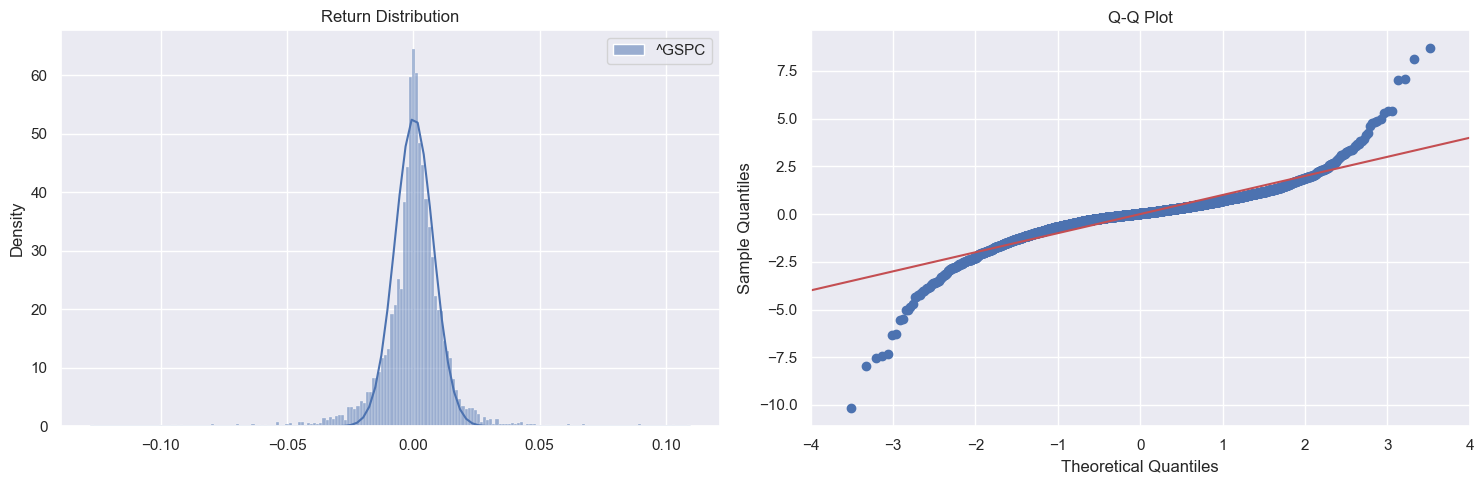

In [9]:
analyze_distribution(sp500_returns, 'S&P 500')

Bitcoin Distribution Properties:
Skewness: -0.6667
Excess Kurtosis: 14.3274


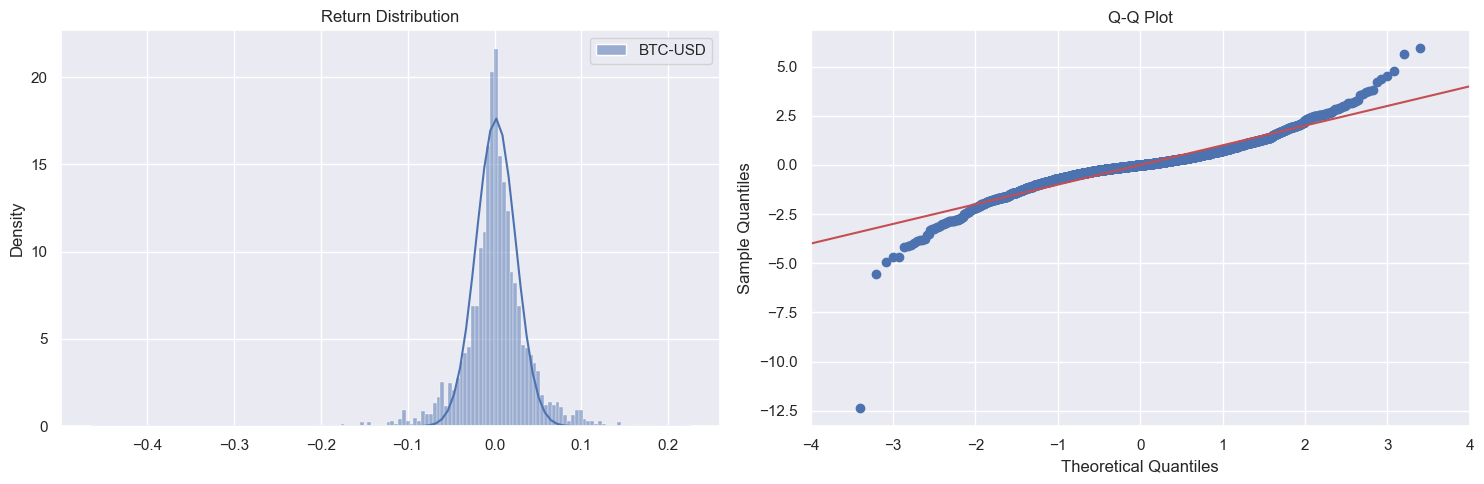

In [10]:
analyze_distribution(btc_returns, 'Bitcoin')

## Curtosi

La **curtosi** è una misura della “pesantezza delle code” della distribuzione di probabilità di una variabile casuale reale. Come la **asimmetria** (*skewness*), la curtosi descrive la forma di una distribuzione di probabilità e ci sono diversi modi per quantificarla.

La curtosi di una distribuzione gaussiana è pari a **3**. Valori di curtosi più alti corrispondono a una maggiore presenza di deviazioni estreme (o *outlier*), da cui i termini “code pesanti”, “code grasse” o “code spesse”.

È pratica comune utilizzare una versione aggiustata della curtosi, chiamata **curtosi in eccesso** (*excess kurtosis*), che si ottiene sottraendo 3 dalla curtosi.

La definizione standard della curtosi di una variabile casuale $X$ è il **quarto momento standardizzato**, ovvero:
$$\mathbb{E} \left[ \left( \frac{X - \mu}{\sigma} \right)^4 \right]$$
dove $\mu$ è la media e $\sigma$ è la deviazione standard della variabile $X$.


**Figura 2.14** mostra la curtosi dei rendimenti dell’S&P 500 nel periodo 2007–2022 in funzione dell’intervallo temporale dei rendimenti. All’aumentare dell’intervallo da un giorno a tre giorni, la **curtosi in eccesso** diminuisce molto rapidamente, per poi stabilizzarsi intorno a valori compresi tra **6 e 8**.

Analogamente, **Figura 2.15** mostra la curtosi dei rendimenti di **Bitcoin** nel periodo 2017–2022. Anche in questo caso, all’aumentare dell’intervallo da uno a tre giorni, la curtosi in eccesso diminuisce molto rapidamente, scendendo sotto il valore di **3**.

Curiosamente, la curtosi di Bitcoin sembra essere inferiore a quella dell’S&P 500. Pertanto, in una prima approssimazione, potrebbe sembrare che le criptovalute abbiano **code meno pesanti**, o siano **più gaussiane**, rispetto alle azioni. Tuttavia, questo merita un’analisi più approfondita, osservando la curtosi in eccesso in diversi periodi.

* Dal **2017 al 2019**: 5,41 per l’S&P 500 e 3,46 per Bitcoin.  
* Durante il **2020**: 8,51 per l’S&P 500 e 50,87 per Bitcoin.  
* Dal **2021 al 2022**: 0,95 per l’S&P 500 e 2,34 per Bitcoin.

## Test Statistici

Dall'analisi precedente, i dati finanziari mostrano chiaramente asimmetria e curtosi. Per valutare se questi parametri, insieme alla media e alla varianza, siano sufficienti per caratterizzare i dati, possiamo ricorrere a test statistici matematicamente validi.

L'**Anderson–Darling statistic** misura quanto bene i dati seguono una particolare distribuzione (più la distribuzione si adatta ai dati, più piccolo sarà questo valore). Le ipotesi per il test di Anderson–Darling sono:

- **H0**: i dati seguono una distribuzione specificata (ipotesi nulla);
- **H1**: i dati non seguono una distribuzione specificata (ipotesi alternativa).


Come di consueto, possiamo utilizzare il valore **p** per determinare se i dati provengono dalla distribuzione scelta (se è inferiore a una certa soglia, tipicamente 0,05 o giù di lì, allora possiamo rifiutare l'ipotesi nulla che i dati provengano da quella distribuzione).

La **Tabella 2.1** mostra i risultati del test di Anderson–Darling per tre distribuzioni: la Gaussiana, la distribuzione **t** di Student (che modella le code pesanti) e la distribuzione **t** asimmetrica (che tiene conto sia dell'asimmetria che delle code pesanti). Da questi risultati possiamo concludere che la distribuzione **t** asimmetrica fornisce un buon adattamento all'S&P 500 durante il periodo 2015–2020. 

Per un'ispezione visiva aggiuntiva, la **Figura 2.16** mostra i grafici Q–Q dei dati empirici rispetto alle tre distribuzioni candidate (Gaussiana, **t** di Student e **t** asimmetrica). Possiamo nuovamente confermare che la distribuzione **t** asimmetrica è un buon adattamento.

![test](./images/fitting-QQ-plots-1.png)

# Struttura temporale

I rendimenti sono [i.i.d.](https://it.wikipedia.org/wiki/Variabili_indipendenti_e_identicamente_distribuite) o mostrano una qualche struttura temporale? Questa è una domanda chiave in finanza perché determina il problema della previsione dei rendimenti o dei prezzi. In effetti, questo è stato un argomento molto dibattuto in economia per decenni. L'ipotesi del mercato efficiente (EMH) afferma che i prezzi delle azioni riflettono tutte le informazioni e la generazione costante di "alpha" è impossibile (Fama, 1970). Di conseguenza, le azioni vengono sempre scambiate al loro valore equo nelle borse, rendendo impossibile per gli investitori acquistare azioni sottovalutate o vendere azioni a prezzi gonfiati. Pertanto, dovrebbe essere impossibile superare il mercato complessivo attraverso la selezione esperta delle azioni o il market timing, e l'unico modo in cui un investitore può ottenere rendimenti più elevati è acquistando investimenti più rischiosi.

Sebbene sia un pilastro della teoria finanziaria moderna, l'EMH è altamente controversa e spesso contestata (Shiller, 1981). I sostenitori sostengono che sia inutile cercare azioni sottovalutate o cercare di prevedere le tendenze del mercato attraverso l'analisi fondamentale o tecnica. Teoricamente, né l'analisi tecnica né quella fondamentale possono produrre rendimenti aggiustati per il rischio (cioè, "alpha") in modo coerente, e solo le informazioni privilegiate possono risultare in rendimenti aggiustati per il rischio eccezionali. Sebbene gli accademici presentino un corpo sostanziale di prove a sostegno di essa, vi è anche un uguale numero di dissensi. Ad esempio, l'investitore basato sui fondamentali Warren Buffett o il fondo hedge Medallion Fund di Renaissance Technologies hanno costantemente superato il mercato per lunghi periodi, il che per definizione è impossibile secondo l'EMH.

I sostenitori dell'EMH concludono che, a causa della casualità del mercato, gli investitori potrebbero fare meglio investendo in un portafoglio passivo a basso costo. D'altra parte, gli oppositori insistono sulla possibilità di progettare portafogli che possano battere il mercato.

Alcuni libri di testo accessibili che trattano l'analisi temporale includono Tsay (2010), Cowpertwait e Metcalfe (2009), e Ruppert e Matteson (2015).


La funzione di autocorrelazione (ACF) e la funzione di autocorrelazione parziale (PACF) sono ampiamente utilizzate nell'analisi delle serie temporali e nelle previsioni. Misurano la struttura lineare o la dipendenza lungo il dominio temporale, che, secondo l'EMH, dovrebbe essere insignificante (Ding e Granger, 1996). L'autocorrelazione è semplicemente la correlazione tra il segnale in un momento e un momento precedente, mentre l'autocorrelazione parziale elimina l'effetto del segnale tra quei due istanti temporali.

La **Figura 2.17** indica che l'indice S&P 500 non mostra quasi nessuna autocorrelazione significativa che possa essere sfruttata dai modelli di previsione (i ritardi diversi da zero sono fondamentalmente entro il livello statisticamente insignificante). La **Figura 2.18** illustra in modo simile che non vi è alcuna autocorrelazione significativa da sfruttare nel Bitcoin (i rendimenti orari non mostrano autocorrelazioni).

In [11]:
def plot_autocorrelation(returns, title):
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
    plot_acf(returns, ax=ax1, lags=40)
    plot_pacf(returns, ax=ax2, lags=40)
    fig.suptitle(title)
    plt.tight_layout()
    plt.show()

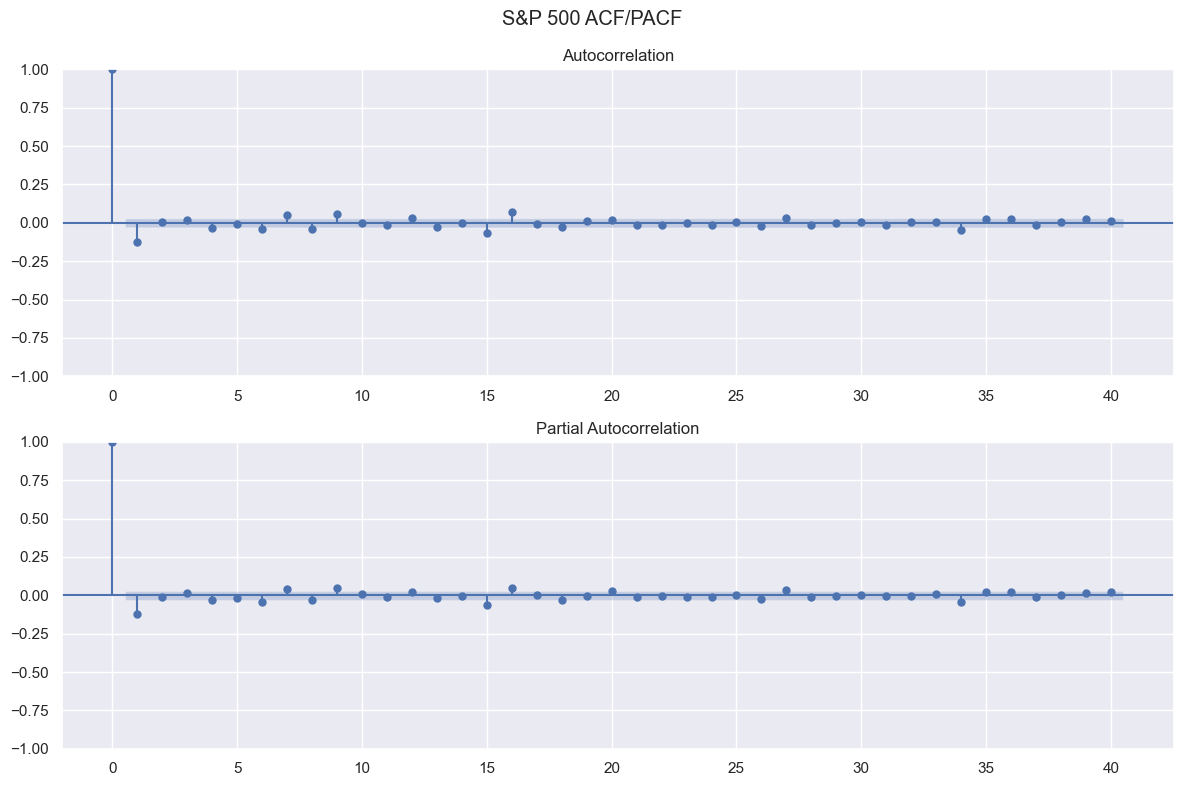

In [12]:
plot_autocorrelation(sp500_returns, 'S&P 500 ACF/PACF')

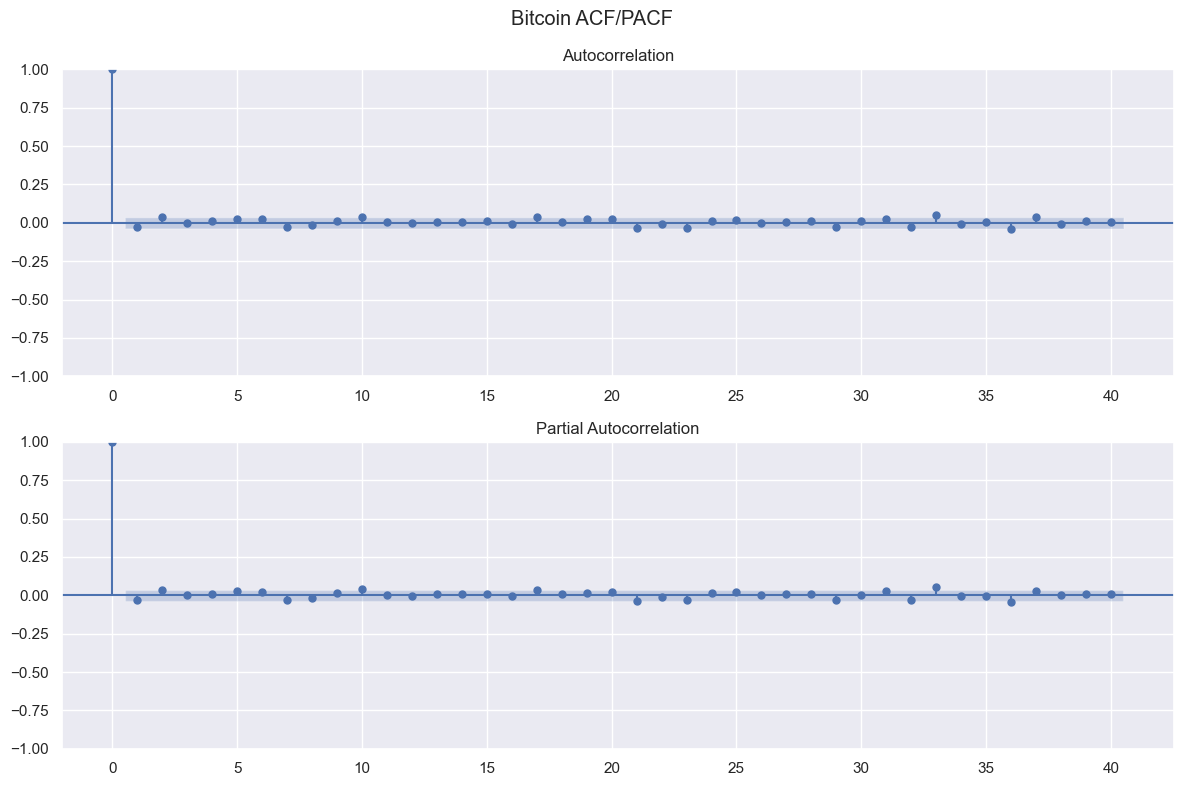

In [13]:
plot_autocorrelation(btc_returns, 'Bitcoin ACF/PACF')

### Struttura Non Lineare nei Rendimenti

Dall'assenza precedente di autocorrelazioni significative, si potrebbe essere tentati di concludere che non vi sia alcuna struttura temporale da sfruttare. Tuttavia, questa sarebbe una conclusione errata. Un'ispezione visiva dei rendimenti è sufficiente per vedere che chiaramente è presente una struttura nell'involucro di volatilità del segnale (Ding e Granger, 1996), che misura la deviazione standard variabile nel tempo del segnale lungo il dominio temporale.

La **Figura 2.19** mostra i log-rendimenti dell'S&P 500 insieme all'involucro di volatilità, illustrando il fenomeno del cosiddetto clustering di volatilità. Chiaramente l'involucro di volatilità cambia lentamente e può essere facilmente previsto, come già sottolineato negli anni '90 (Ding e Granger, 1996). La **Figura 2.20** mostra i log-rendimenti del Bitcoin insieme all'involucro di volatilità, mostrando anch'esso il clustering di volatilità.

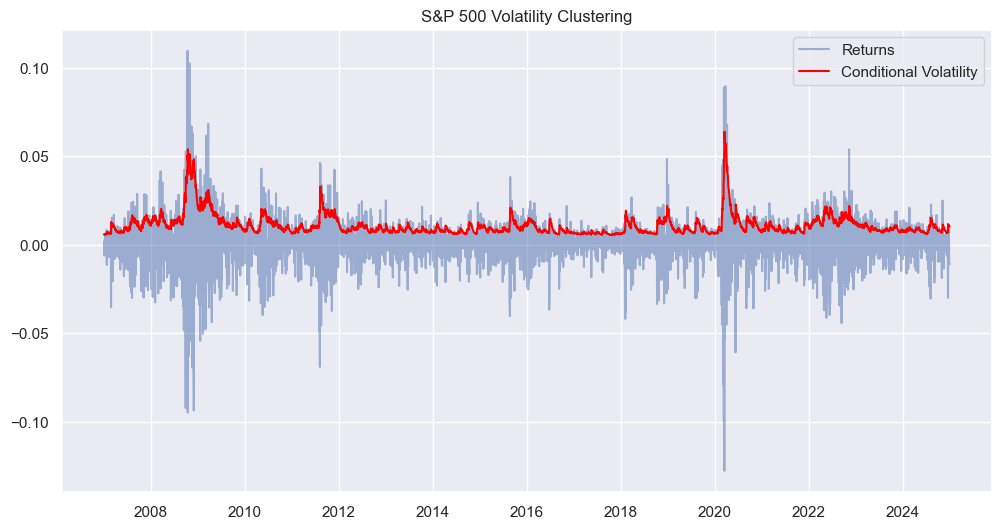

In [14]:
def estimate_volatility(returns):
    model = arch.arch_model(returns, vol='Garch', p=1, q=1, rescale=False)
    result = model.fit(disp='off')
    return result.conditional_volatility

sp500_vol = estimate_volatility(sp500_returns)
btc_vol = estimate_volatility(btc_returns)

def plot_volatility(returns, vol, title):
    fig, ax = plt.subplots(figsize=(12,6))
    ax.plot(returns, alpha=0.5, label='Returns')
    ax.plot(vol, color='red', label='Conditional Volatility')
    ax.set_title(title)
    ax.legend()
    plt.show()
    
plot_volatility(sp500_returns, sp500_vol, 'S&P 500 Volatility Clustering')

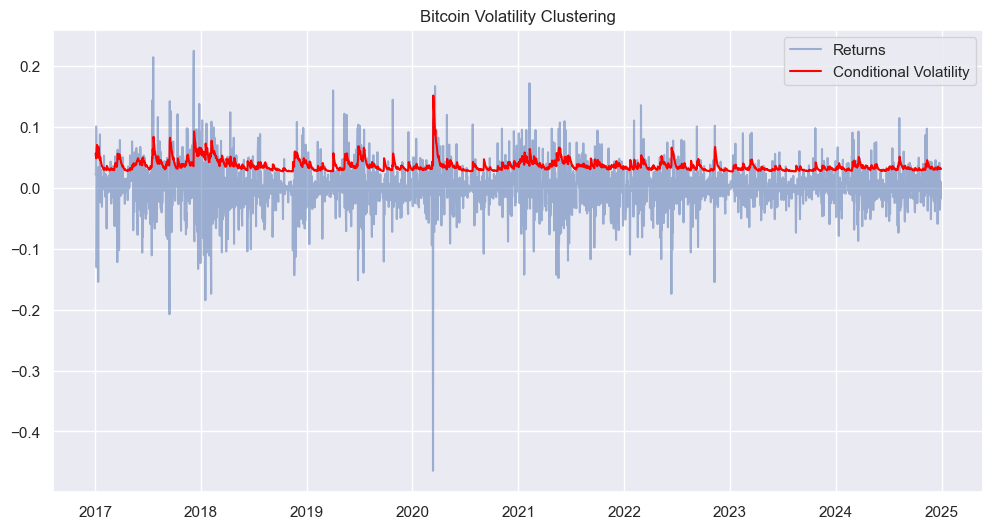

In [15]:
plot_volatility(btc_returns, btc_vol, 'Bitcoin Volatility Clustering')

Ma come è possibile che i rendimenti non mostrino autocorrelazioni significative ma chiaramente ci sia una struttura temporale? La risposta risiede nel fatto che l'autocorrelazione misura solo la dipendenza lineare. Le dipendenze non lineari sono più difficili da rilevare. Infatti, il machine learning è uno strumento potenziale per cercare di identificare tali dipendenze non lineari (López de Prado, 2018a). Poiché l'involucro è fondamentalmente una versione smussata del valore assoluto del segnale, si potrebbe calcolare invece l'autocorrelazione dei valori assoluti dei rendimenti. La **Figura 2.21** mostra valori di autocorrelazione molto significativi per i valori assoluti dei log-rendimenti dell'S&P 500. Allo stesso modo, la **Figura 2.22** mostra valori di autocorrelazione significativi per i valori assoluti dei log-rendimenti del Bitcoin (sebbene non così significativi come nel caso dell'S&P 500).

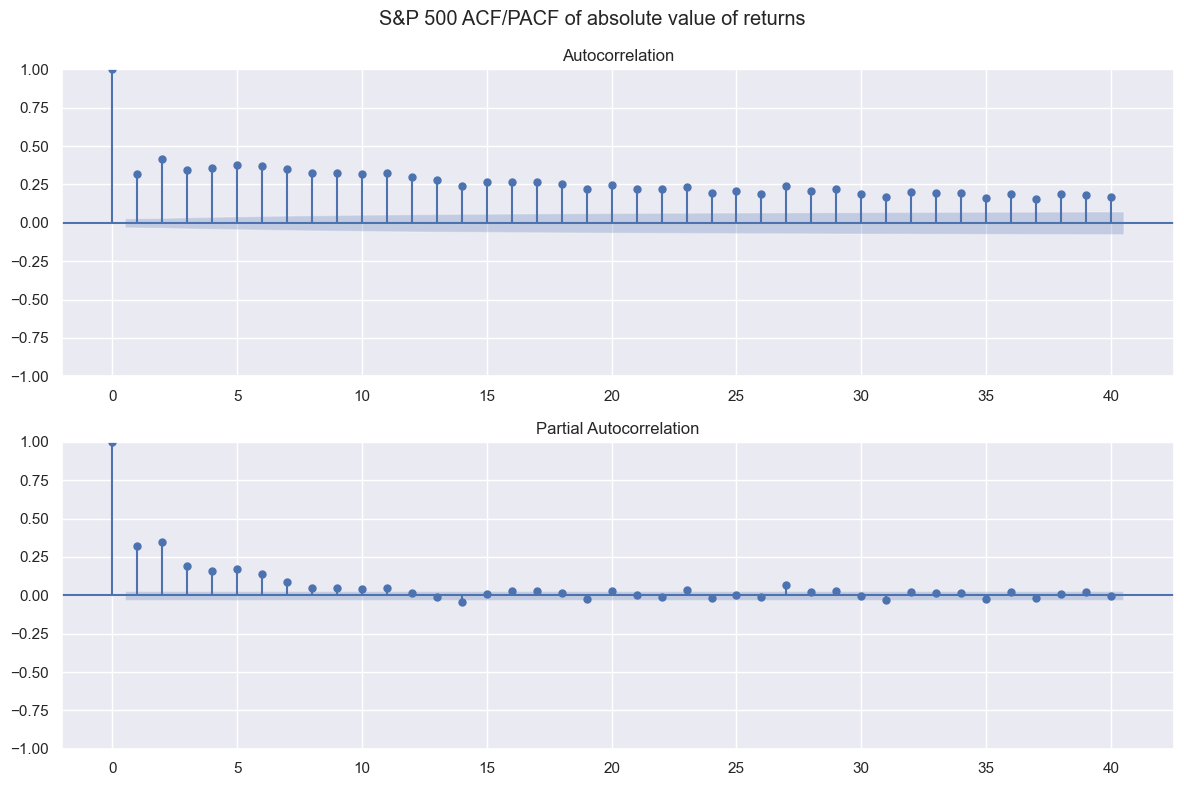

In [16]:
plot_autocorrelation(abs(sp500_returns), 'S&P 500 ACF/PACF of absolute value of returns')

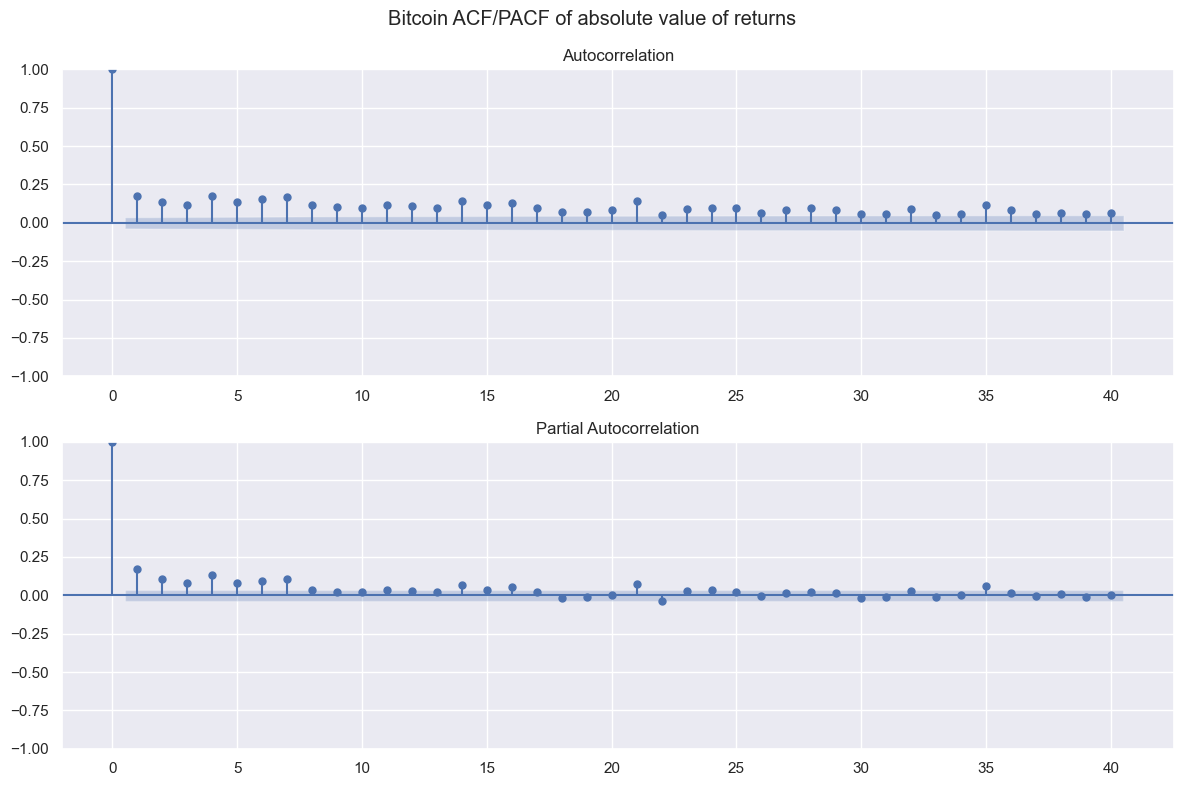

In [17]:
plot_autocorrelation(abs(btc_returns), 'Bitcoin ACF/PACF of absolute value of returns')

### Rendimenti Standardizzati

Può essere utile eliminare l'involucro di volatilità dai rendimenti (cioè, dividendo i rendimenti per la volatilità) per ottenere una serie temporale senza clustering di volatilità, chiamata rendimenti standardizzati.


### Struttura degli Asset

Oltre alla struttura lungo la dimensione temporale, che può essere utilizzata per la modellazione e la previsione, esiste una struttura lungo la dimensione degli asset (nota anche come struttura trasversale). Questo significa che, piuttosto che considerare gli asset uno per uno in modo indipendente, devono essere modellati congiuntamente.

Questo è particolarmente importante quando si tratta di valutare il rischio di un portafoglio, poiché diverse azioni possono avere correlazioni diverse. Ad esempio, si può diversificare un investimento allocando capitale a diversi asset, ma se sono fortemente correlati potrebbe non aiutare a ridurre il rischio. La **Figura 2.25** illustra l'effetto della correlazione degli asset sulla volatilità del portafoglio equamente ponderato per il caso di due asset con correlazione $\rho$ e ciascuno con varianza 1. Possiamo osservare che per asset completamente correlati, $\rho = 1$, il portafoglio non beneficia di alcuna diversità rispetto all'investimento in un singolo asset e la varianza rimane a 1 (volatilità di 1); per asset non correlati, $\rho = 0$, il portafoglio ottiene un beneficio di diversità con la varianza ridotta a metà (volatilità di $\sqrt{0.5}$), e per asset negativamente correlati, $\rho < 0$, il beneficio di diversità aumenta ulteriormente. In realtà, gli asset tendono ad avere una correlazione elevata vicina a 1 e trovare asset o classi di asset non correlati è il "sacro graal". Il caso particolare di asset completamente negativamente correlati, $\rho = -1$, può essere ottenuto con un asset sintetico creato al solo scopo di coprire un altro per controllare l'esposizione al rischio.

![correlation](./images/effect-correlation-on-portfolio-1.png)



La **Figura 2.26** mostra le mappe di calore della matrice di correlazione di alcuni titoli dell'S&P 500 (rendimenti giornalieri) e di alcune criptovalute (rendimenti orari). Rispetto agli elementi diagonali (che sono uguali a 1), i componenti fuori diagonale sono molto più deboli (e nessun valore è negativo). Nel caso delle criptovalute, ad esempio, c'è una coppia di nomi che sono completamente correlati: BTC e WBTC, il che è previsto poiché WBTC è per definizione un BTC avvolto (wrapped).

Possiamo confermare l'osservazione precedente che le correlazioni incrociate sono per lo più non negative dai grafici a barre mostrati nella **Figura 2.27** per i titoli dell'S&P 500 (rendimenti giornalieri) e le criptovalute (rendimenti orari). In effetti, questa correlazione positiva tra azioni e criptovalute non è sorprendente poiché gli asset tendono a muoversi insieme al mercato.

![correlation](./images/positive-corr-1.png)

Per esplorare più a fondo la struttura degli asset, vale la pena ispezionare come gli autovalori della matrice di correlazione tendano a raggrupparsi in pochissimi grandi e un grande gruppo di molto più piccoli, la cosiddetta struttura del modello fattoriale (Fama e French, 1992; Sharpe, 1964) (vedi il Capitolo 3 per i dettagli). La **Figura 2.28** mostra gli istogrammi degli autovalori della matrice di correlazione dei rendimenti giornalieri per i titoli dell'S&P 500 e dei rendimenti orari per le prime 82 criptovalute. In entrambi i casi, possiamo osservare che un singolo autovalore è totalmente predominante (corrispondente all'indice di mercato e costituendo quasi la metà del valore totale degli autovalori), forse con uno a quattro altri autovalori non trascurabili, mentre il resto di essi è di ordini di grandezza più piccoli (nota che l'asse orizzontale segue una scala logaritmica).

![correlation](./images/covmat-eigenvalues-1.png)